In [1]:
#importa bibliotecas
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#abre arquivo e importa em um dataframe

data = pd.read_csv('Fonte IBGE/CAGEDEST_122018.txt', encoding = 'ISO-8859-1', decimal = ',', delimiter = ';')

In [3]:
#verifica quais são as colunas
data.columns

Index(['Admitidos/Desligados', 'Competência Declarada', 'Município',
       'Ano Declarado', 'CBO 2002 Ocupação', 'CNAE 1.0 Classe',
       'CNAE 2.0 Classe', 'CNAE 2.0 Subclas', 'Faixa Empr Início Jan',
       'Grau Instrução', 'Qtd Hora Contrat', 'IBGE Subsetor', 'Idade',
       'Ind Aprendiz', 'Ind Portador Defic', 'Raça Cor', 'Salário Mensal',
       'Saldo Mov', 'Sexo', 'Tempo Emprego', 'Tipo Estab', 'Tipo Defic',
       'Tipo Mov Desagregado', 'UF', 'Bairros SP', 'Bairros Fortaleza',
       'Bairros RJ', 'Distritos SP', 'Regiões Adm DF', 'Mesorregião',
       'Microrregião', 'Região Adm RJ', 'Região Adm SP', 'Região Corede',
       'Região Corede 04', 'Região Gov SP', 'Região Senac PR',
       'Região Senai PR', 'Região Senai SP', 'Sub-Região Senai PR',
       'Ind Trab Parcial', 'Ind Trab Intermitente'],
      dtype='object')

In [4]:
#renomeia o nome das colunas para facilitar a analize
data.rename(columns={'Admitidos/Desligados': 'admitidos_desligados', 
                     'Competência Declarada': 'competencia_declarada', 
                     'Município': 'municipio',
                     'Ano Declarado' : 'ano_declarado',
                     'CBO 2002 Ocupação' : 'cbo_2002_ocupacao',
                     'CNAE 1.0 Classe' : 'cnae_10_classe',
                     'CNAE 2.0 Classe' : 'cnae_20_classe',
                     'CNAE 2.0 Subclas' : 'cnae_20_subclas',
                     'Faixa Empr Início Jan' : 'faixa_empr_ini_jan',
                     'Grau Instrução' : 'grau_instrucao',
                     'Qtd Hora Contrat' : 'qtd_hora_contrat',
                     'IBGE Subsetor' : 'ibge_subsetor',
                     'Idade' : 'idade',
                     'Ind Aprendiz' : 'ind_aprendiz', 
                     'Ind Portador Defic' : 'ind_portador_defic',
                     'Raça Cor' : 'raca_cor',
                     'Salário Mensal':'salario_mensal',
                     'Saldo Mov':'salario_mov',
                     'Sexo':'sexo',
                     'Tempo Emprego':'tempo_emprego',
                     'Tipo Estab':'tipo_estab',
                     'Tipo Defic':'tipo_defic',
                     'Tipo Mov Desagregado':'tipo_mov_desagregado',
                     'UF':'uf',
                     'Bairros SP':'bairros_sp',
                     'Bairros Fortaleza':'bairros_fortaleza',
                     'Bairros RJ':'bairros_rj',
                     'Distritos SP':'distritos_sp',
                     'Regiões Adm DF':'regioes_adm_df',
                     'Mesorregião':'mesoregiao',
                     'Microrregião':'microregiao',
                     'Região Adm RJ':'regiao_adm_rj',
                     'Região Adm SP':'regiao_adm_sp',
                     'Região Corede':'regiao_corede',
                     'Região Corede 04':'regiao_corede_04',
                     'Região Gov SP':'regiao_gov_sp',
                     'Região Senac PR':'regiao_senac_pr',
                     'Região Senai PR':'regiao_senai_pr',
                     'Região Senai SP':'regiao_senai_sp',
                     'Sub-Região Senai PR':'subregiao_senai_pr',
                     'Ind Trab Parcial':'ind_trab_parcial',
                     'Ind Trab Intermitente':'ind_trab_intermitente'}, inplace=True)

In [5]:
#verifica as colunas renomeadas
data.columns

Index(['admitidos_desligados', 'competencia_declarada', 'municipio',
       'ano_declarado', 'cbo_2002_ocupacao', 'cnae_10_classe',
       'cnae_20_classe', 'cnae_20_subclas', 'faixa_empr_ini_jan',
       'grau_instrucao', 'qtd_hora_contrat', 'ibge_subsetor', 'idade',
       'ind_aprendiz', 'ind_portador_defic', 'raca_cor', 'salario_mensal',
       'salario_mov', 'sexo', 'tempo_emprego', 'tipo_estab', 'tipo_defic',
       'tipo_mov_desagregado', 'uf', 'bairros_sp', 'bairros_fortaleza',
       'bairros_rj', 'distritos_sp', 'regioes_adm_df', 'mesoregiao',
       'microregiao', 'regiao_adm_rj', 'regiao_adm_sp', 'regiao_corede',
       'regiao_corede_04', 'regiao_gov_sp', 'regiao_senac_pr',
       'regiao_senai_pr', 'regiao_senai_sp', 'subregiao_senai_pr',
       'ind_trab_parcial', 'ind_trab_intermitente'],
      dtype='object')

In [6]:
#verifica informações basicas do dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256752 entries, 0 to 2256751
Data columns (total 42 columns):
admitidos_desligados     int64
competencia_declarada    int64
municipio                int64
ano_declarado            int64
cbo_2002_ocupacao        int64
cnae_10_classe           int64
cnae_20_classe           int64
cnae_20_subclas          int64
faixa_empr_ini_jan       int64
grau_instrucao           int64
qtd_hora_contrat         int64
ibge_subsetor            int64
idade                    int64
ind_aprendiz             int64
ind_portador_defic       int64
raca_cor                 int64
salario_mensal           float64
salario_mov              int64
sexo                     int64
tempo_emprego            float64
tipo_estab               int64
tipo_defic               int64
tipo_mov_desagregado     int64
uf                       int64
bairros_sp               object
bairros_fortaleza        object
bairros_rj               object
distritos_sp             object
regioes_adm

In [7]:
data.shape

(2256752, 42)

In [8]:
data.describe()

,admitidos_desligados,competencia_declarada,municipio,ano_declarado,cbo_2002_ocupacao,cnae_10_classe,cnae_20_classe,cnae_20_subclas,faixa_empr_ini_jan,grau_instrucao,...,tempo_emprego,tipo_estab,tipo_defic,tipo_mov_desagregado,uf,regioes_adm_df,mesoregiao,microregiao,ind_trab_parcial,ind_trab_intermitente
count,2.256752e+06,2256752.0,2.256752e+06,2256752.0,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,...,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06
mean,1.574103e+00,201812.0,3.553863e+05,2018.0,5.368213e+05,5.304958e+04,5.126839e+04,5.126847e+06,4.303066e+00,6.595547e+00,...,1.318030e+01,1.084850e+00,1.553693e-02,6.216255e+00,3.534381e+01,7.773592e-01,3.540988e+03,3.537022e+04,4.852106e-03,5.339089e-03
std,4.944784e-01,0.0,8.300073e+04,0.0,1.784826e+05,2.269392e+04,2.468035e+04,2.468034e+06,2.646710e+00,1.548538e+00,...,3.413455e+01,4.031142e-01,2.154446e-01,9.922202e+00,8.311311e+00,8.125151e+01,8.309257e+02,8.310356e+03,6.948788e-02,7.287376e-02
min,1.000000e+00,201812.0,1.100010e+05,2018.0,3.011000e+04,1.112000e+03,1.113000e+03,1.113010e+05,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,1.101000e+03,1.100100e+04,0.000000e+00,0.000000e+00
25%,1.000000e+00,201812.0,3.147000e+05,2018.0,4.141050e+05,4.525000e+04,4.213800e+04,4.213800e+06,2.000000e+00,6.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,3.100000e+01,0.000000e+00,3.108000e+03,3.103900e+04,0.000000e+00,0.000000e+00
50%,2.000000e+00,201812.0,3.531500e+05,2018.0,5.174100e+05,5.241800e+04,4.773300e+04,4.773300e+06,4.000000e+00,7.000000e+00,...,2.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,3.500000e+01,0.000000e+00,3.512000e+03,3.504600e+04,0.000000e+00,0.000000e+00
75%,2.000000e+00,201812.0,4.117900e+05,2018.0,7.152100e+05,7.412800e+04,7.490100e+04,7.490102e+06,6.000000e+00,7.000000e+00,...,1.100000e+01,1.000000e+00,0.000000e+00,6.000000e+00,4.100000e+01,0.000000e+00,4.110000e+03,4.103700e+04,0.000000e+00,0.000000e+00
max,2.000000e+00,201812.0,5.300100e+05,2018.0,9.922250e+05,9.900700e+04,9.900800e+04,9.900800e+06,9.000000e+00,9.000000e+00,...,5.990000e+02,3.000000e+00,6.000000e+00,9.000000e+01,5.300000e+01,9.999000e+03,5.301000e+03,5.300100e+04,1.000000e+00,1.000000e+00


In [9]:
data.uf.value_counts()

35    688857
31    246945
33    188489
41    170120
43    157854
42    146020
29     90707
52     84286
26     60574
51     55122
23     52509
32     47781
53     41253
15     39004
50     38272
24     21884
21     18458
13     18290
25     17646
27     14584
22     13289
11     13213
28     11753
17      9888
16      3560
12      3435
14      2959
Name: uf, dtype: int64

In [10]:
#TEMOS UM PROBLEMA, OS ESTADOS ESTÃO EM CÓDIGO
#VOU CONVERTER PARA UF UTILIZANDO A BASE DE CÓDIGOS: https://www.oobj.com.br/bc/article/quais-os-c%C3%B3digos-de-cada-uf-no-brasil-465.html
#IMPORTA O ARQUIVO COM AS SIGLAS DOS ESTADOS
siglas = pd.read_csv('Fonte IBGE/siglas.csv', encoding = 'UTF-8', delimiter = ';')
data = pd.merge(data, siglas, on ='uf', how='left')
data.head()

,admitidos_desligados,competencia_declarada,municipio,ano_declarado,cbo_2002_ocupacao,cnae_10_classe,cnae_20_classe,cnae_20_subclas,faixa_empr_ini_jan,grau_instrucao,...,regiao_corede_04,regiao_gov_sp,regiao_senac_pr,regiao_senai_pr,regiao_senai_sp,subregiao_senai_pr,ind_trab_parcial,ind_trab_intermitente,estado,sigla
0,1,201812,500215,2018,711210,1619,1610,161003,1,6,...,99,999,99,{ñ,999,99,0,0,Mato Grosso do Sul,MS
1,1,201812,500710,2018,321210,2119,2101,210101,1,8,...,99,999,99,{ñ,999,99,0,0,Mato Grosso do Sul,MS
2,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,99,999,99,{ñ,999,99,0,1,Mato Grosso do Sul,MS
3,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,99,999,99,{ñ,999,99,0,1,Mato Grosso do Sul,MS
4,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,99,999,99,{ñ,999,99,0,1,Mato Grosso do Sul,MS


In [11]:
dic_grau = pd.read_csv('Fonte IBGE/dic_grau_instrucao.csv', encoding = 'UTF-8', delimiter = ';')
data = pd.merge(data, dic_grau, on ='grau_instrucao', how='left')
data.head()

,admitidos_desligados,competencia_declarada,municipio,ano_declarado,cbo_2002_ocupacao,cnae_10_classe,cnae_20_classe,cnae_20_subclas,faixa_empr_ini_jan,grau_instrucao,...,regiao_gov_sp,regiao_senac_pr,regiao_senai_pr,regiao_senai_sp,subregiao_senai_pr,ind_trab_parcial,ind_trab_intermitente,estado,sigla,desc_instrucao
0,1,201812,500215,2018,711210,1619,1610,161003,1,6,...,999,99,{ñ,999,99,0,0,Mato Grosso do Sul,MS,Médio Incompleto
1,1,201812,500710,2018,321210,2119,2101,210101,1,8,...,999,99,{ñ,999,99,0,0,Mato Grosso do Sul,MS,Superior Incompleto
2,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,99,{ñ,999,99,0,1,Mato Grosso do Sul,MS,Até 5ª Incompleto
3,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,99,{ñ,999,99,0,1,Mato Grosso do Sul,MS,Até 5ª Incompleto
4,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,99,{ñ,999,99,0,1,Mato Grosso do Sul,MS,Até 5ª Incompleto


In [12]:
dic_raca = pd.read_csv('Fonte IBGE/dic_raca.csv', encoding = 'UTF-8', delimiter = ';')
data = pd.merge(data, dic_raca, on ='raca_cor', how='left')
data.head()

,admitidos_desligados,competencia_declarada,municipio,ano_declarado,cbo_2002_ocupacao,cnae_10_classe,cnae_20_classe,cnae_20_subclas,faixa_empr_ini_jan,grau_instrucao,...,regiao_senac_pr,regiao_senai_pr,regiao_senai_sp,subregiao_senai_pr,ind_trab_parcial,ind_trab_intermitente,estado,sigla,desc_instrucao,desc_raca
0,1,201812,500215,2018,711210,1619,1610,161003,1,6,...,99,{ñ,999,99,0,0,Mato Grosso do Sul,MS,Médio Incompleto,PARDA
1,1,201812,500710,2018,321210,2119,2101,210101,1,8,...,99,{ñ,999,99,0,0,Mato Grosso do Sul,MS,Superior Incompleto,BRANCA
2,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,99,{ñ,999,99,0,1,Mato Grosso do Sul,MS,Até 5ª Incompleto,PARDA
3,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,99,{ñ,999,99,0,1,Mato Grosso do Sul,MS,Até 5ª Incompleto,PARDA
4,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,99,{ñ,999,99,0,1,Mato Grosso do Sul,MS,Até 5ª Incompleto,PARDA


In [13]:
dic_sexo = pd.read_csv('Fonte IBGE/dic_sexo.csv', encoding = 'UTF-8', delimiter = ';')
data = pd.merge(data, dic_sexo, on ='sexo', how='left')
data.head()

,admitidos_desligados,competencia_declarada,municipio,ano_declarado,cbo_2002_ocupacao,cnae_10_classe,cnae_20_classe,cnae_20_subclas,faixa_empr_ini_jan,grau_instrucao,...,regiao_senai_pr,regiao_senai_sp,subregiao_senai_pr,ind_trab_parcial,ind_trab_intermitente,estado,sigla,desc_instrucao,desc_raca,desc_sexo
0,1,201812,500215,2018,711210,1619,1610,161003,1,6,...,{ñ,999,99,0,0,Mato Grosso do Sul,MS,Médio Incompleto,PARDA,MASCULINO
1,1,201812,500710,2018,321210,2119,2101,210101,1,8,...,{ñ,999,99,0,0,Mato Grosso do Sul,MS,Superior Incompleto,BRANCA,MASCULINO
2,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,{ñ,999,99,0,1,Mato Grosso do Sul,MS,Até 5ª Incompleto,PARDA,MASCULINO
3,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,{ñ,999,99,0,1,Mato Grosso do Sul,MS,Até 5ª Incompleto,PARDA,MASCULINO
4,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,{ñ,999,99,0,1,Mato Grosso do Sul,MS,Até 5ª Incompleto,PARDA,MASCULINO


In [14]:
#verifica se continua com a mesma qtd de linhas
data.shape

(2256752, 47)

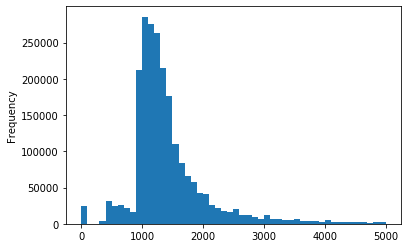

In [15]:
#plota o histograma para verificar a distribuicao atual
data.salario_mensal.plot.hist(bins=50, range=(0,5000))

In [16]:
#verifica se é uma distribuição normal com a função scipy.stats.shapiro
stats.shapiro(data.salario_mensal)

(0.2637892961502075, 0.0)

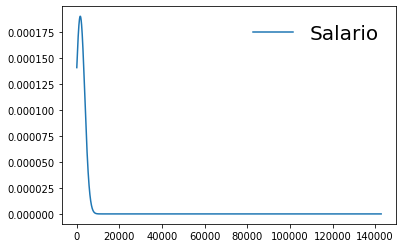

1039127    0.0
622432     0.0
622462     0.0
622463     0.0
1457667    0.0
Name: salario_mensal, dtype: float64

In [17]:
#plota a curva de densidade probabilistica
# criando uma figura com um gráfico 
mpl.rcParams['agg.path.chunksize'] = 0
fig, ax = plt.subplots(1, 1)
# definindo os valores de x
x = data.salario_mensal.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(x, stats.norm.pdf(x, mu, sigma),label='Salario')
# imprimindo a legenda
ax.legend(loc='best', frameon=False,fontsize = 20)
# mostrando o gráfico
plt.show()
x.head()

In [18]:
#normaliza a curva utilizando LOG (numpy.log) e salva em uma nova coluna: OBS: SOMA +1 NO SALARIO PARA EVITAR ERROS DE LOG = 0 QUE TENDEM AO INFINITO NEGATIVO
data["salario_log"] = np.log(data.salario_mensal+1)

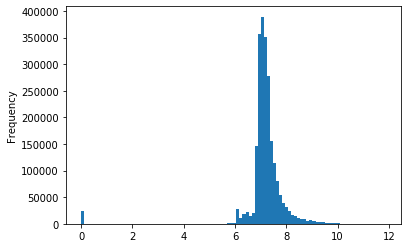

In [19]:
#plota o histograma para verificar a distribuicao depois da normalização
data.salario_log.plot.hist(bins=100)

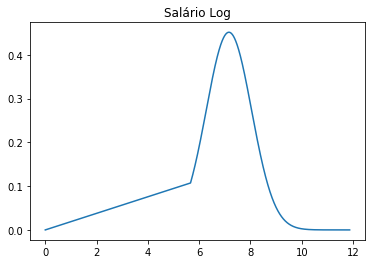

In [20]:
#plota a curva de densidade probabilistica com a normalização 
fig, ax = plt.subplots(1, 1)
# definindo os valores de x
x = data.salario_log.sort_values()
# calculando a média
mu = data.salario_log.mean()
# calculando o desvio padrão populacional
sigma = data.salario_log.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(x, stats.norm.pdf(x, mu, sigma))
# imprimindo a legenda
ax.set_title("Salário Log")
# mostrando o gráfico
plt.show()

In [21]:
#calcula a padronização Z
data["salario_padrao"] = ( data.salario_log - data.salario_log.mean() ) / data.salario_log.std()

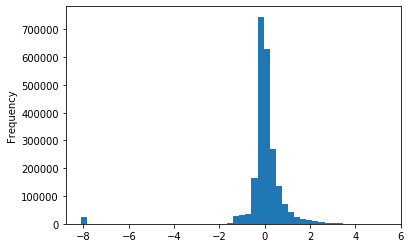

In [22]:
#plota o histograma do salario normalizado e padronizado em Z
data.salario_padrao.plot.hist(bins=50)

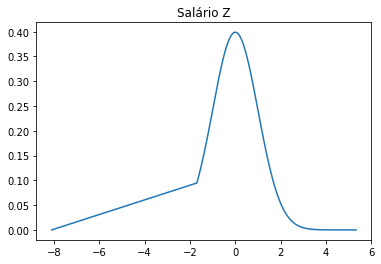

In [23]:
#plota a curva de densidade probabilistica com a normalização e a padronizacao
fig, ax = plt.subplots(1, 1)
# definindo os valores de x
x = data.salario_padrao.sort_values()
# calculando a média
mu = data.salario_padrao.mean()
# calculando o desvio padrão populacional
sigma = data.salario_padrao.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(x, stats.norm.pdf(x, mu, sigma))
# imprimindo a legenda
ax.set_title("Salário Z")
# mostrando o gráfico
plt.show()

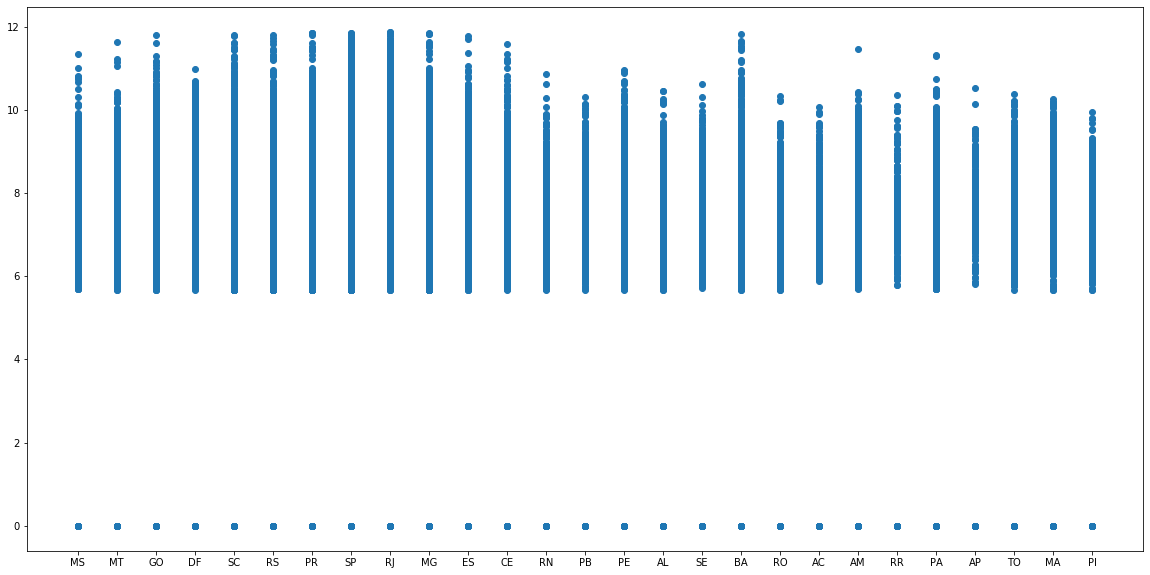

In [24]:
# plota a disperção do salario x UF
plt.figure(figsize=(20,10))
plt.scatter(x=data.sigla, y=data.salario_log)

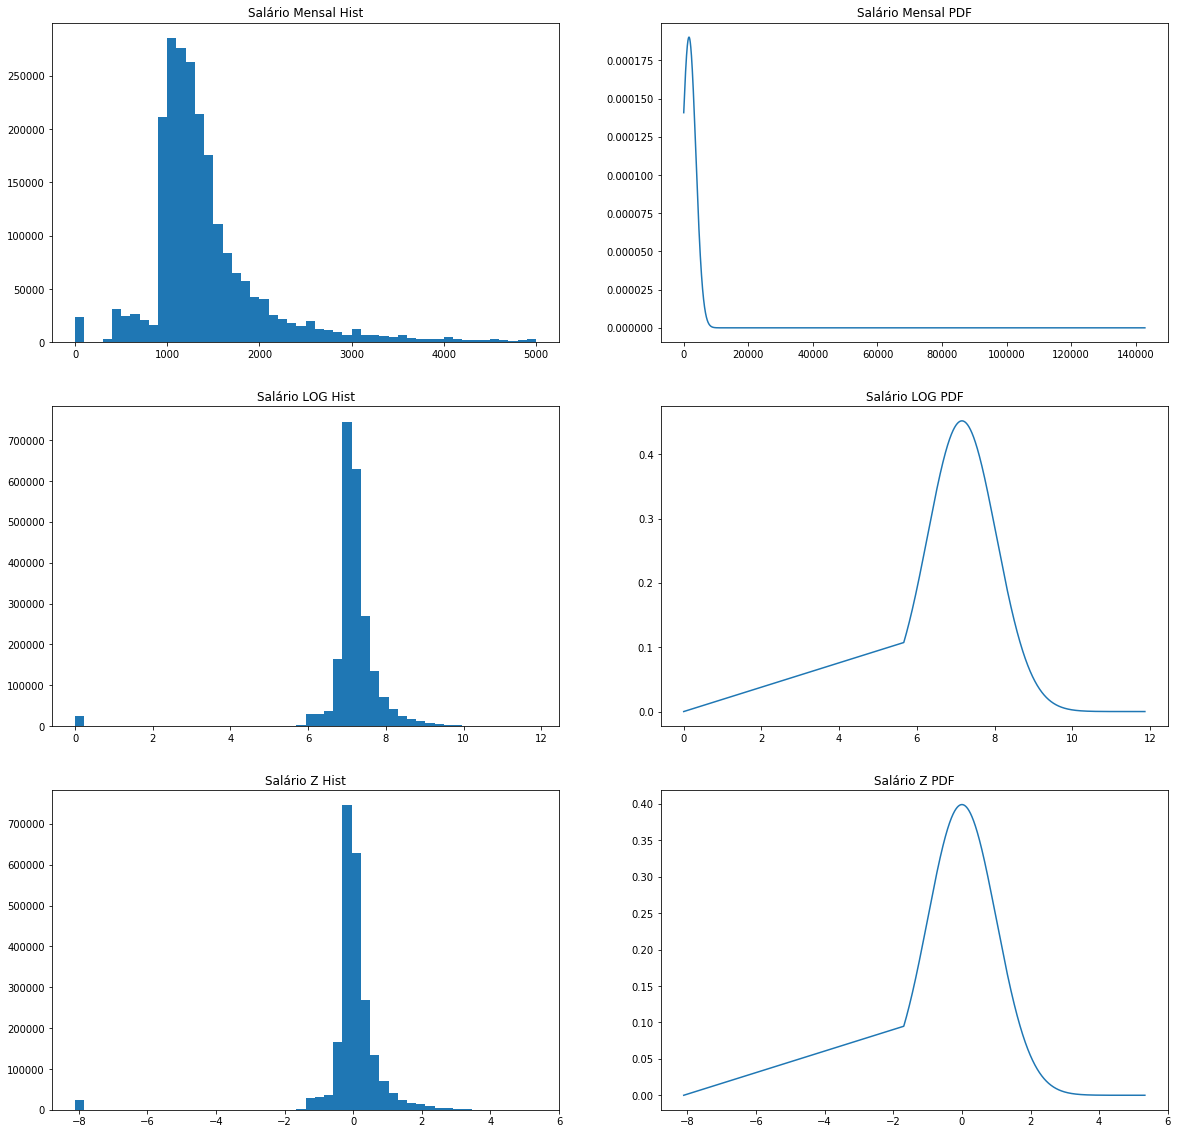

In [25]:
#PLOTA TODOS OS GRAFICOS :D
fig, ax = plt.subplots(3, 2,figsize=(20,20)) #cria a matriz de plotagem com 6 graficos

#plota o histograma do salario mensal
x = data.salario_mensal
ax[0,0].hist(x, bins=50, range=(0,5000))
ax[0,0].set_title("Salário Mensal Hist")

#plota a curva de densidade do salario mensal
x = data.salario_mensal.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax[0,1].plot(x, stats.norm.pdf(x, mu, sigma))
ax[0,1].set_title("Salário Mensal PDF")

#plota o histograma do salario normalizado
x = data.salario_log
ax[1,0].hist(x, bins=50)
ax[1,0].set_title("Salário LOG Hist")

#plota a curva de densidade do salario mensal
x = data.salario_log.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax[1,1].plot(x, stats.norm.pdf(x, mu, sigma))
ax[1,1].set_title("Salário LOG PDF")

#plota o histograma do salario Z
x = data.salario_padrao
ax[2,0].hist(x, bins=50)
ax[2,0].set_title("Salário Z Hist")

#plota a curva de densidade do salario mensal
x = data.salario_padrao.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax[2,1].plot(x, stats.norm.pdf(x, mu, sigma))
ax[2,1].set_title("Salário Z PDF")

plt.show()

In [30]:
filtra = ((data.idade > 17) & (data.idade < 25) & (data.sexo == 2))
data_mulher = data.loc[filtra]

In [31]:
data_mulher.head()

,admitidos_desligados,competencia_declarada,municipio,ano_declarado,cbo_2002_ocupacao,cnae_10_classe,cnae_20_classe,cnae_20_subclas,faixa_empr_ini_jan,grau_instrucao,...,subregiao_senai_pr,ind_trab_parcial,ind_trab_intermitente,estado,sigla,desc_instrucao,desc_raca,desc_sexo,salario_log,salario_padrao
39,1,201812,500240,2018,914425,1139,1130,113000,9,7,...,99,0,0,Mato Grosso do Sul,MS,Médio Completo,BRANCA,FEMININO,7.073270,-0.098812
40,1,201812,500830,2018,782510,2119,2101,210101,9,7,...,99,0,0,Mato Grosso do Sul,MS,Médio Completo,PARDA,FEMININO,7.972121,0.919019
60,1,201812,500580,2018,623015,1414,1512,151201,1,6,...,99,0,0,Mato Grosso do Sul,MS,Médio Incompleto,PARDA,FEMININO,6.967909,-0.218118
69,1,201812,500710,2018,621005,1414,1512,151201,2,6,...,99,0,0,Mato Grosso do Sul,MS,Médio Incompleto,BRANCA,FEMININO,6.276643,-1.000886
77,1,201812,500540,2018,623310,1457,1555,155505,3,4,...,99,0,0,Mato Grosso do Sul,MS,6ª a 9ª Fundamental,PARDA,FEMININO,6.967909,-0.218118


In [32]:
data_mulher.salario_padrao = ( data_mulher.salario_log - data_mulher.salario_log.mean() ) / data_mulher.salario_log.std()

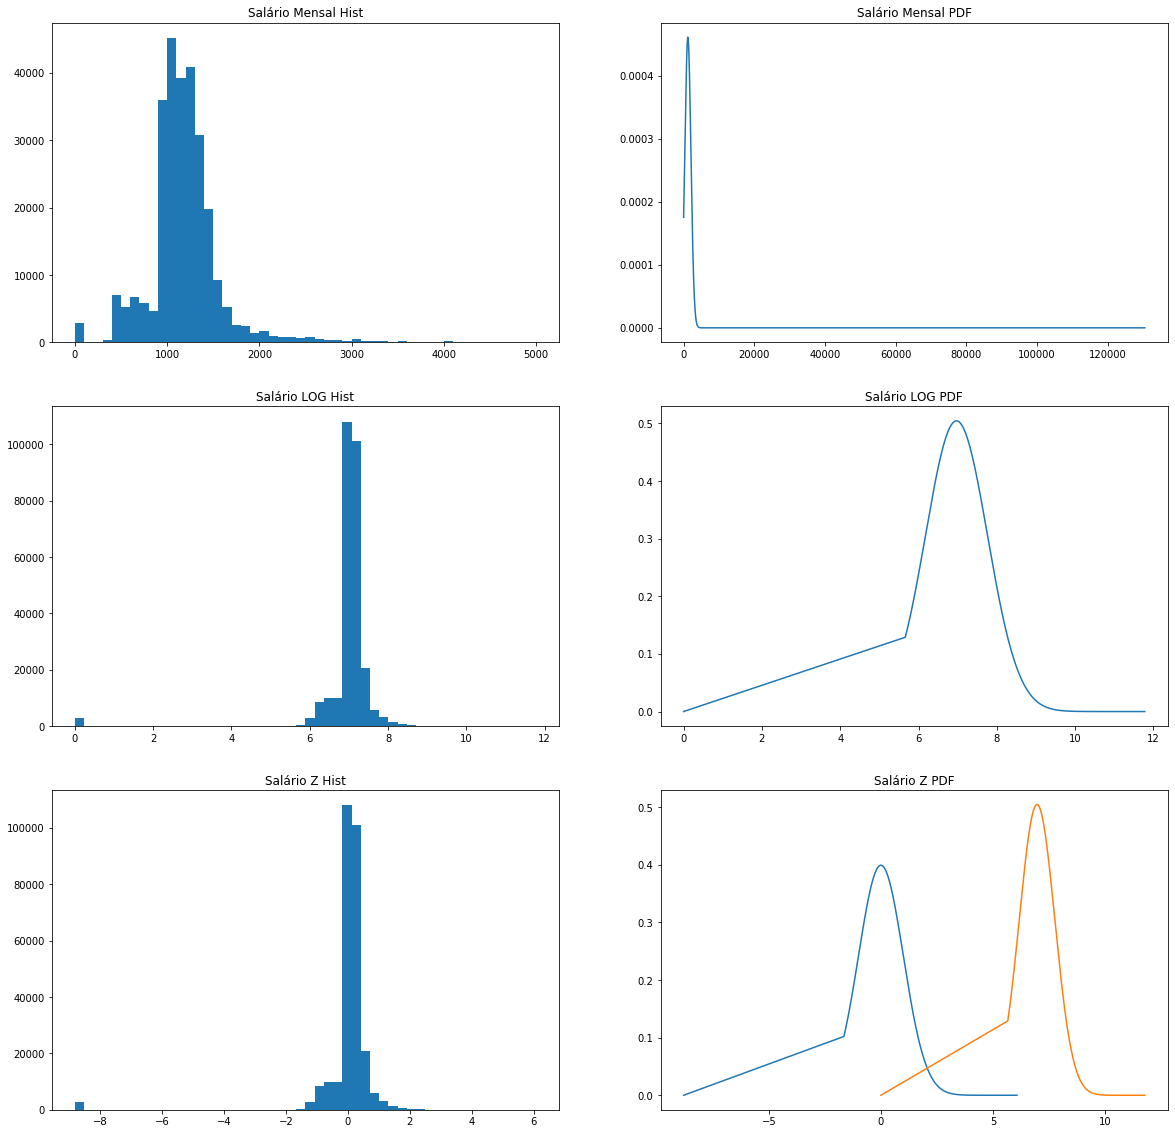

In [39]:
#PLOTA TODOS OS GRAFICOS :D
fig, ax = plt.subplots(3, 2,figsize=(20,20)) #cria a matriz de plotagem com 6 graficos

#plota o histograma do salario mensal
x = data_mulher.salario_mensal
ax[0,0].hist(x, bins=50, range=(0,5000))
ax[0,0].set_title("Salário Mensal Hist")

#plota a curva de densidade do salario mensal
x = data_mulher.salario_mensal.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax[0,1].plot(x, stats.norm.pdf(x, mu, sigma))
ax[0,1].set_title("Salário Mensal PDF")

#plota o histograma do salario normalizado
x = data_mulher.salario_log
ax[1,0].hist(x, bins=50)
ax[1,0].set_title("Salário LOG Hist")

#plota a curva de densidade do salario mensal
x = data_mulher.salario_log.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax[1,1].plot(x, stats.norm.pdf(x, mu, sigma))
ax[1,1].set_title("Salário LOG PDF")

#plota o histograma do salario Z
x = data_mulher.salario_padrao
ax[2,0].hist(x, bins=50)
ax[2,0].set_title("Salário Z Hist")

#plota a curva de densidade do salario mensal
x = data_mulher.salario_padrao.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax[2,1].plot(x, stats.norm.pdf(x, mu, sigma))

x = data_mulher.salario_log.sort_values()
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)

ax[2,1].plot(x, stats.norm.pdf(x, mu, sigma))
ax[2,1].set_title("Salário Z PDF")

plt.show()

In [37]:
stats.shapiro(data_mulher.salario_log)

(0.3814995288848877, 0.0)